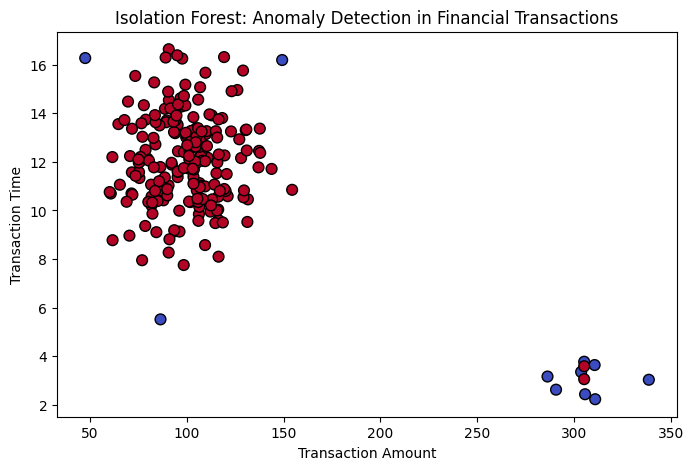

Anomaly counts:
 anomaly
 1    199
-1     11
Name: count, dtype: int64


In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 2. Load Dataset (mock financial transactions)
np.random.seed(42)
n_normal = 200
n_anomaly = 10
amounts = np.concatenate([
    np.random.normal(100, 20, n_normal),   # normal transactions
    np.random.normal(300, 10, n_anomaly)   # anomalous transactions
])
times = np.concatenate([
    np.random.normal(12, 2, n_normal),     # normal transaction times
    np.random.normal(3, 0.5, n_anomaly)    # anomalous times
])
data = pd.DataFrame({'amount': amounts, 'time': times})

# 3. Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['amount', 'time']])

# 4. Visualize Anomalies
plt.figure(figsize=(8,5))
plt.scatter(data['amount'], data['time'], 
            c=data['anomaly'], cmap='coolwarm', edgecolor='k', s=60)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.title('Isolation Forest: Anomaly Detection in Financial Transactions')
plt.show()

# Display anomaly counts
print("Anomaly counts:\n", data['anomaly'].value_counts())